In [7]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [25]:
def clean_text(text):
    text = re.sub(r'<.*?>',' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words ]
     # Join words back
    return ' '.join(words)

# Apply to your dataset
df['cleaned_review'] = df['review'].apply(clean_text)

# View cleaned data
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  


# TF-IDF Vectorization
## We'll convert the cleaned text into numerical vectors using TfidfVectorizer.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the cleaned reviews into vectors
x = vectorizer.fit_transform(df['cleaned_review']).toarray()

# Define the target variable (sentiment)
y = df['sentiment']
 #X is now a numeric feature matrix you can feed into ML models
 #y is the target label (positive or negative)

# Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model Training (Multinomial Naive Bayes)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.851

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# VisualiZation

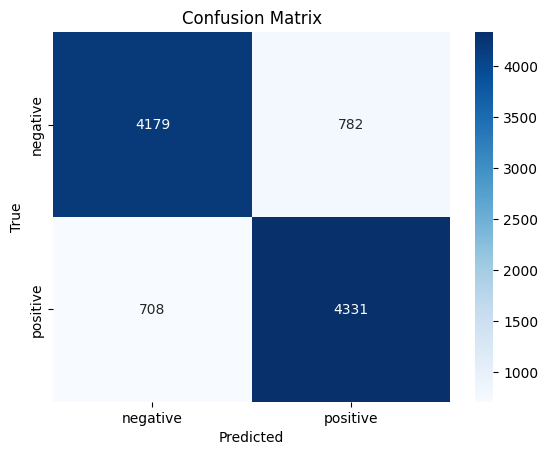

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [69]:
import joblib
import os
os.listdir()


[' Dataset.csv',
 '.ipynb_checkpoints',
 'IMDB Dataset.csv',
 'IMDB Dataset.csv.zip',
 'Sentiment_analysis.ipynb',
 'tfidf_vectorizer.joblib']

In [73]:
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(model, 'sentiment_model_nb.joblib')


['sentiment_model_nb.joblib']

In [75]:
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(model, 'sentiment_model_nb.joblib')


['sentiment_model_nb.joblib']